# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

## Notebook content

- Data Initialization
- General Analysis
- Feature Engineering
- Feature Analysis
- Model Training
- Model Evaluation
- Accuracy Prediction

In [7]:
import os
import pandas as pd
from data_management import DataManager

## Data Initialization

In [8]:
DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)
order_amount = len(data_manager.get_orders_tip())

## Data Analysis
Several Analysis were done to find any tip patterns in the data. The purpose of this analysis is to find specific features that are relevant for the prediction of tip. To find out which attributes have a significant influence on the tip, several analysis task were executed.

In [9]:
from analysis import Analysis, HourOfDay, DayOfWeek, Department, ReorderedAnalysis, DaysSincePriorOrder, AssocRules, TipSequence, OrderNumber, Aisle, Product, NumberOrderUser, ProductCardOrder, GeneralAnalysis, GeneralFacts

TODO: Describe here your analysis task. What is the analysis about, any assumptions before? What did we expect?
TODO: Describe the results also here in this Markdown



##### **Analysis Task Name**
**Analysis:** 

**Result Interpretation:**

In [10]:
# TODO: Initialize your analysis instance
# TODO: Produce your output

##### **General Analysis**
**Analysis:** The general analysis task was created to get an overview of the data set and to find out general facts about the dataset and its data. Typical functions like the mean, median, standard deviation, min and max values were calculated for the different entities. The purpose of this analysis task was to get a first impression of the data set and to find out if there are any irregularities or outliers in the data. The datatypes of the different attributes were checked, and the number of missing values was calculated.

**Result Interpretations:** 
- The dataset mostly contains numerical attributes with a few categorical attributes.
- The dataset is rather large with 32 million rows and 16 columns.
- The dataset contains some missing values in the columns "days_since_prior_order" and some in "tip". The missing "tip" values are limited to the test data.


In [11]:
general_analysis = GeneralAnalysis(data_manager)
general_analysis.execute_analysis()

General facts about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   tip                     object 
 8   product_id              int64  
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
 14  aisle                   object 
 15  department              object 
dtypes: float64(1), int64(10), object(5)
memory usage: 4.0+ GB
None
(33819106, 16)


Size of the Dataset:
Number of prior Data 32434489
Number of train Data 1384617


General Information

##### **General Facts**
**Analysis:** For data understanding and getting familiar with the data set and the overall relations between the main entities, some general facts about the dataset were collected. Therefore several facts has been calculated containing the different entities and there relations.

**Result Interpretations:** The results are important to clarify weather the calculations fit with the overall facts of the dataset and do not contain any calculation errors or changed the dataset.

In [5]:
general_facts = GeneralFacts(data_manager)
general_facts.execute_analysis()

General facts about the dataset
Order specific analysis:
Total amount of orders        : 3214874
Total amount of users         : 206209
Average orders / user         : 15.590367054784224
Average tipped orders / user  : 9.669346519049208
Overall order tip probability : 0.4408440268576622
----------

Product specific analysis:
Total amount of products       : 49677
Average products / order       : 10.088883421247614
Average order amount / product : 652.90756285605
----------

Department specific analysis:
Total amount of departments       : 21
Average departments / order       : 4.736172552952309
Average products / department     : 2365.5714285714284
Average order amount / department : 1544499.4761904762
----------

Aisle specific analysis:
Total amount of aisles       : 134
Average aisles / order       : 7.25952339034127
Average products / aisle     : 370.7238805970149
Average order amount / aisle : 242048.42537313432


##### **Add to card order analysis per Product**
**Analysis:** To find out weather the add to card order of a specific product has an impact on the tip probability of that product, an analysis task has been created which calculates the tip probability of the products in dependence of the add_to_cart_order. To compare the "add to card order" of a product, the rational scaled variable (add_to_card_order) has to be normalized. With that normalization every "add to cart order" is transformed to an additional normalized_add_to_card attribute order within the interval [0,1]. After the calculation of the normalized attribute, the variable has been subdivided in 10 bins. Within these bins the mean tip probability of every product is calculated and visualized within the box plot below.

**Result Interpretations:** The boxplot below shows the distribution of the product specific tip probabilities in dependence of the normalized "add to card order". It displays the median, potential outliers and the area between the 25th and the 75th quartile which represents 50% of the data. Considering the area between the 25th and 75th quartile, it can be recognized that there is no overall impact of the normalized add_to_card oder on the product specific tip probability. Focussing the outliers, it can be seen that there are some differences between the different bins. However, because the range between the 25th and 75th percentile is so constant, it can be assumed that these outliers are not necessarily related to "add to card or" but are due to other influences.\
&rarr; **No overall impact of add_to_card_order on the tip probability of the products** &rarr; no feature crafted and no further analysis on the attribute "add_to_card_order"

In [6]:
product_card_order = ProductCardOrder(data_manager)
#product_card_order.execute_analysis()

##### **Reordered tip probability analysis per Product**
**Analysis:** To find out weather the amount of reorders has an influence on the tip probability of a product, an analysis has been done which compares the product specific tip probability in dependence of the product reordered probability. Because of the fact that the "reordered" attribute is a user specific flag, the calculated product reordered rate describes the probability that a product is reordered. With a high reordered rate we can assume that the product has been bought quite often across all users. The heatmap below shows the product tip probability in comparison to the reordered rate. The purpose of this analysis task was to identify weather the reordered rate has an overall influence of the tip probability. The assumption here was that the tip probability of the products generally increases with a rising reordered rate.

**Result Interpretations:** The heatmap overall shows that there is no general connection between the reordered rate and the product specific tip probability. As the reordered rate increases, the product tip probability of the products remains relatively constant and does not change depending on the reordered rate.\
&rarr; **No overall impact of reordered rate on the tip probability of the products** &rarr; no feature crafted

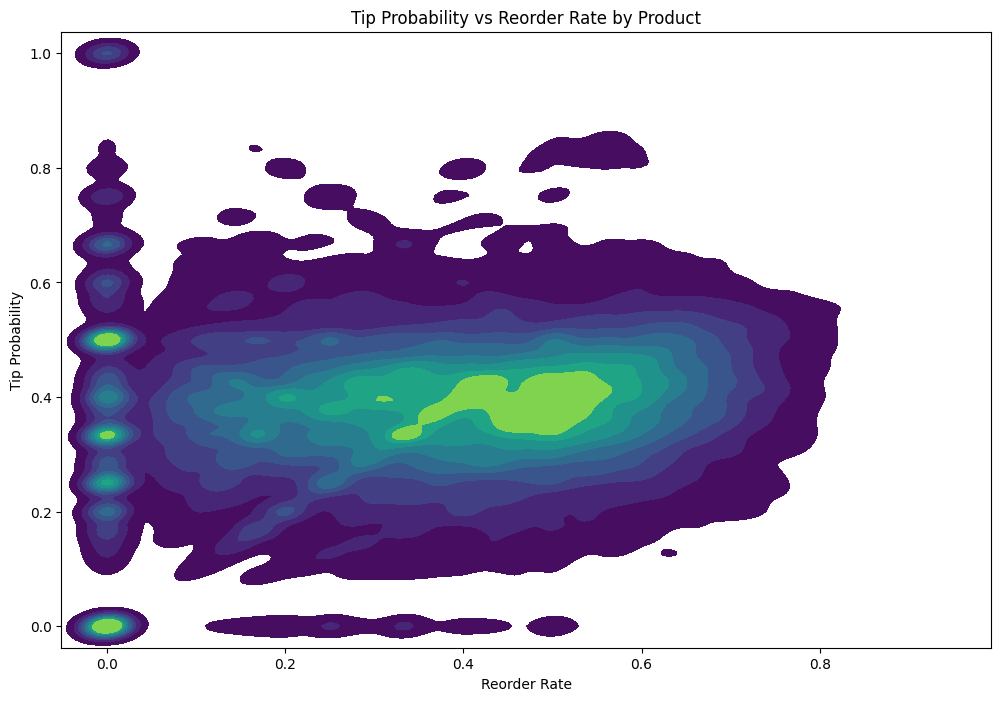

In [7]:
reordered_tip_rate = ReorderedAnalysis(data_manager)
reordered_tip_rate.execute_analysis()

##### **Number of Orders per User**
**Analysis:** To find out weather the number of orders per user has an influence on the tip probability, an analysis has been done which compares the tip probability in dependence on the number of orders per user. The purpose of this analysis task was to identify weather the number of orders per user has an overall influence on the tip probability. 
For the analysis, the number of orders per user has been calculated and the tip probability has been calculated for every user. The tip probability has been calculated by dividing the number of tipped orders by the number of orders of the user. The tip probability has been calculated for every user and the mean tip probability has been calculated for every number of orders per user. The results are visualized in the line plot below.

**Result Interpretations:** The line plot below shows that the tip probability of the users increases constantly with the number of orders per user until it reaches a ceiling at around 50 orders per user. Afther that the tip propability starts a slight downward trend which is rather unstable. To note is that the most data points are located in the range of 0 to 50 orders per user.
This analysis shows that the number of orders per user has a significant impact on the tip probability and should be considered as a feature.

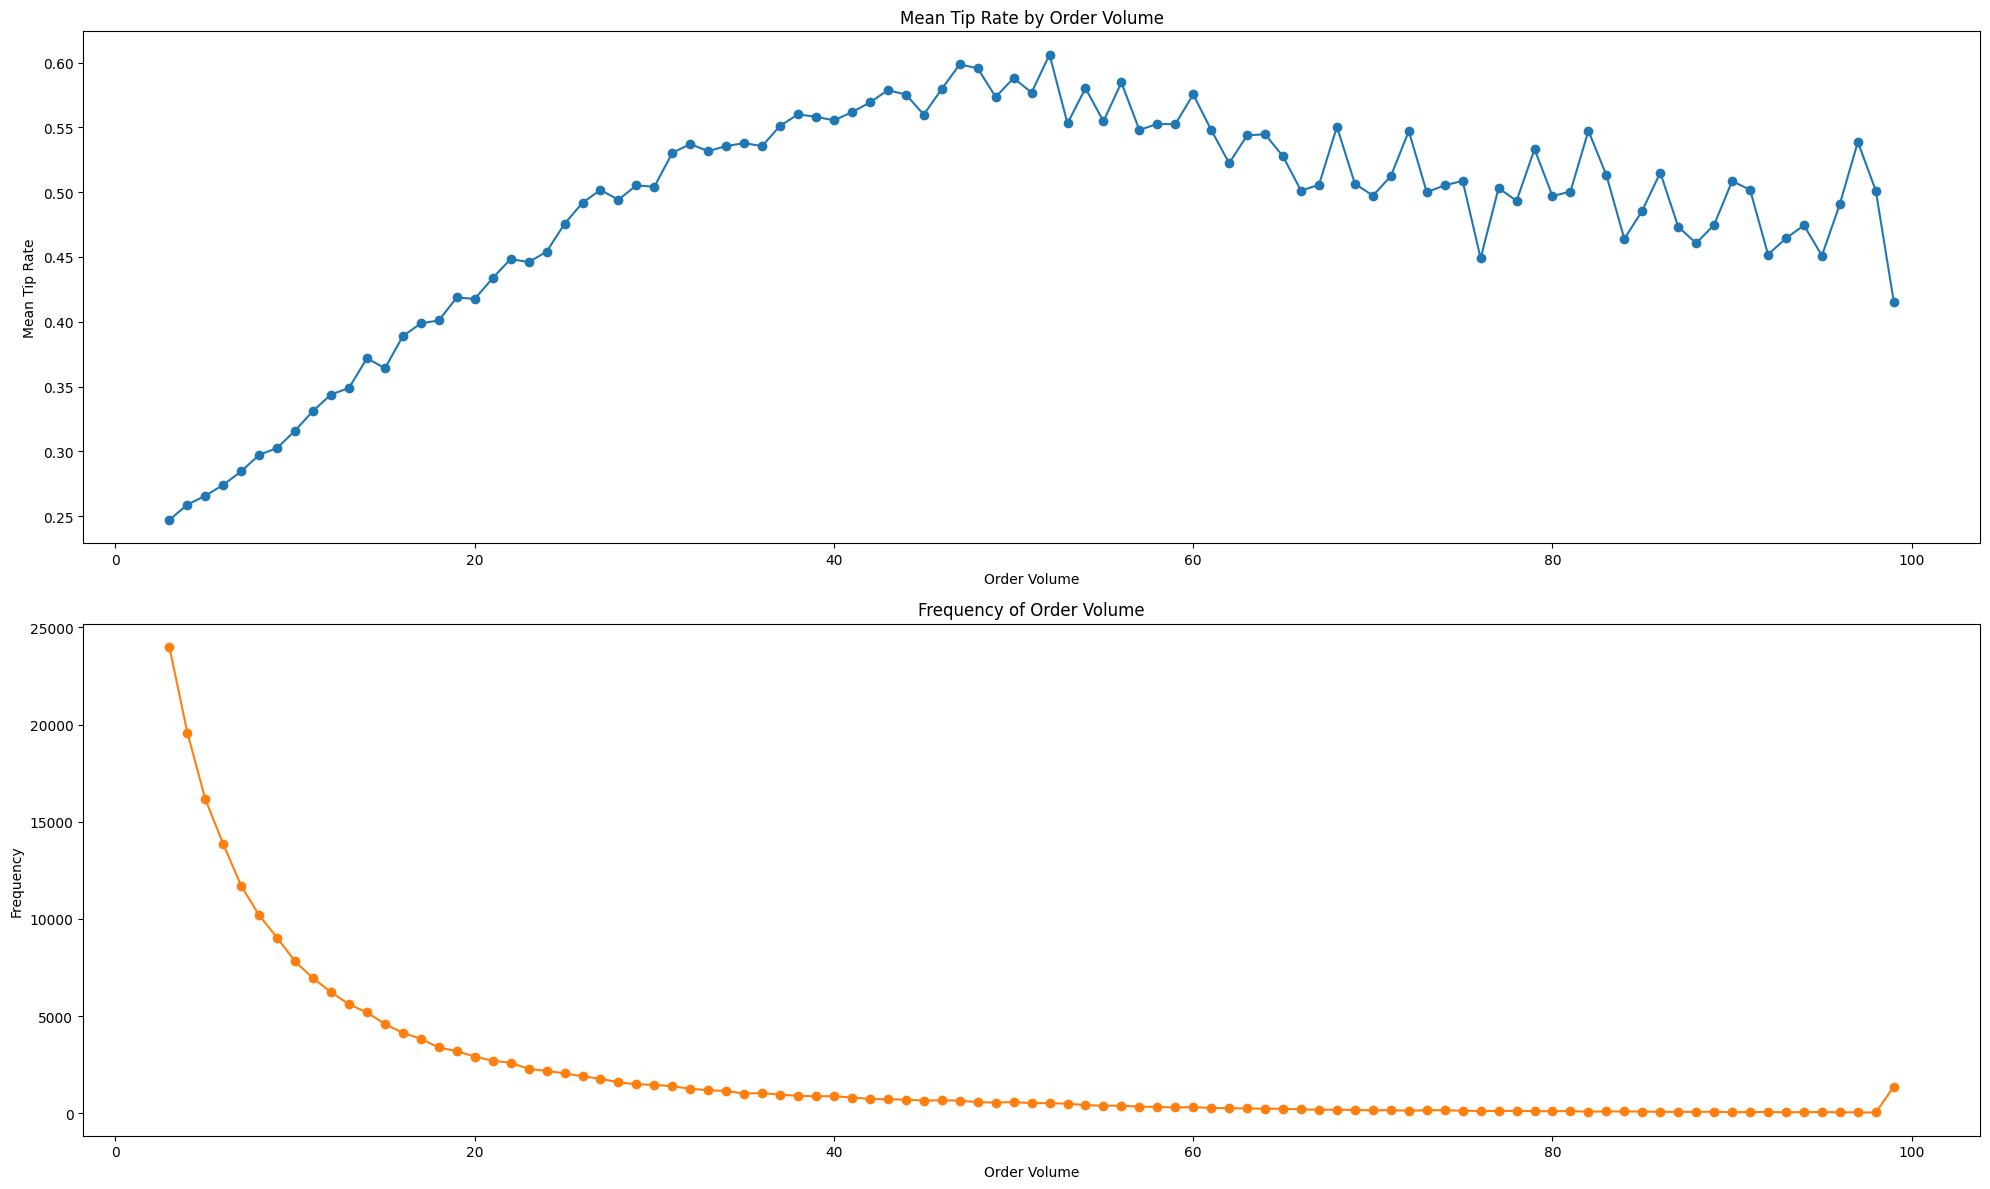

In [13]:
num_order_user = NumberOrderUser(data_manager)
num_order_user.execute_analysis()

## Feature Engineering
With the results of the general analysis task and our specific assumptions of any relation between tip and various data combinations, a few features were build that we think will make a potential impact. The explanation of each feature and corresponding impact analysis will be covered in the next chapter (Feature analysis). To execute the impact analysis of the features, it is necessary to compute them all before.

For the computation of the features, it is distinguished between two types of features:
- **Static features:** Features that are calculated user specific and consider just the last orders of the specific user. These features can be computed once and do not need to be recalculated for a newly created fold in a time series cross validation.
- **Dynamic features:** Features that are calculated user comprehensive like the product tip rate of all orders. For these features we use to data of the whole dataset or fold in cross validation. Therefore the dynamic features need to be recalculated for every new fold in the cross validation.

In [15]:
from feature_engineering.static_features import ContainsAlcohol, DowHighTipProbability, TipHistory, OrderSize, OrderNumberSquared, PrevOrderTipped, MeanOrderedRate, CustomerLifetime, ReorderedRatio, OrderFrequency, HodHighTipProbability, PrevTippedProductsRatio, RelDaysSinceTip, DaysSinceTip, LastTipSequence, AvgSizePrevOrders, SimOrdersTipRatio
from feature_engineering.dynamic_features import ProductTipRate, DepartmentTipRate, AisleTipRate, AssocRulesAisles, AssocRulesDepartments

In [16]:
# Static Features
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()
rel_days_since_tip = RelDaysSinceTip()
days_since_tip = DaysSinceTip()
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
order_number_squared = OrderNumberSquared()
hod_high_tip_probability = HodHighTipProbability()
dow_high_tip_probability = DowHighTipProbability()
contains_alcohol = ContainsAlcohol()
avg_size_prev_orders = AvgSizePrevOrders()

# Dynamic Features
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()
assoc_rules_departments = AssocRulesDepartments()
assoc_rules_aisles = AssocRulesAisles()

In [17]:
# Static Features
data_manager.register_feature(tip_history)
data_manager.register_feature(reordered_rate)
data_manager.register_feature(order_size)
data_manager.register_feature(customer_lifetime)
data_manager.register_feature(prev_order_tipped)
data_manager.register_feature(prev_tipped_products_ratio)
data_manager.register_feature(order_frequency)
data_manager.register_feature(sim_orders_tip_ratio)
data_manager.register_feature(mean_ordered_rate)
data_manager.register_feature(last_tip_sequence)
data_manager.register_feature(rel_days_since_tip)
data_manager.register_feature(days_since_tip)
data_manager.register_feature(order_number_squared)
data_manager.register_feature(hod_high_tip_probability)
data_manager.register_feature(dow_high_tip_probability)
data_manager.register_feature(contains_alcohol)
data_manager.register_feature(avg_size_prev_orders)

# Dynamic Features
data_manager.register_feature(product_tip_rate)
data_manager.register_feature(department_tip_rate)
data_manager.register_feature(aisle_tip_rate)
data_manager.register_feature(assoc_rules_aisles)
data_manager.register_feature(assoc_rules_departments)

Because of the computing time of each feature, the calculation has been done once before and is imported to the local file system. If it is required to compute the features once again, the next two lines of code need to be executed.

In [18]:
# In case a recomputing of the features is necessary. Remove the comments for the next two lines of code.
# data_manager.compute_features()
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

## Feature analysis
To decide weather a feature will take place in the feature set of the machine learning model, it is necessary to analyze which features have a significant impact on tip. All features that has been computed are described and analyzed in the following section.


In [19]:
# Dataset for analysis
orders_tip_features = data_manager.get_orders_tip_train()

##### **Feature_Name**
**Description:** Describe how the feature is calculated and what does it mean.

**Analysis:** Which impact does the feature have on tip. Does it have any correlations to other features
&rarr; **Is the feature part of the model feature set? and why (one sentence)**

In [20]:
# TODO: Execute the feature_name.analyze_feature() method

##### **Average size of the previous orders(avg_size_prev_orders)**
**Description:** The feature represents the average size of the previous orders of the user.
For this, the size of the previous orders of the user is calculated and the mean of the sizes is taken. 

**Analysis:** The feature has a correlation which is near zero. Furthermore, after the analysis of the feature, it can be seen that the feature has no significant impact on the tip.
The consequence of the low correlation and analysis is that the feature is not part of the model feature set.

Correlation between avg_size_prev_orders and tip: -0.013932183862100005


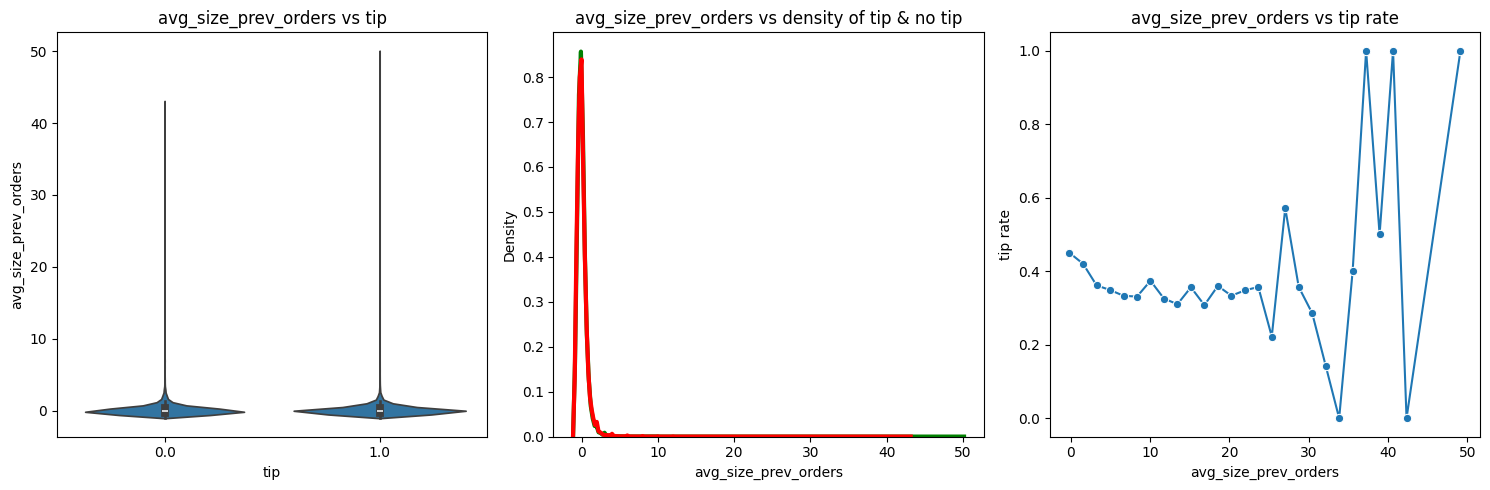

In [21]:
avg_size_prev_orders.analyze_feature(orders_tip_features)

##### **Last Tip Sequence**
**Description:** The feature represents the sum of the length of the last tip sequence. In case the last order has not been tipped, the feature value is always zero. In case the last order has been tipped, all directly consecutive tipped orders are added to the sequence. A "last_tip_sequence" of five means that the last five orders had all been tipped by the user.

**Analysis:** Which impact does the feature have on tip. Does it have any correlations to other features
&rarr; **Is the feature part of the model feature set? and why (one sentence)**

Correlation between last_tip_sequence and tip: 0.33130003325256746


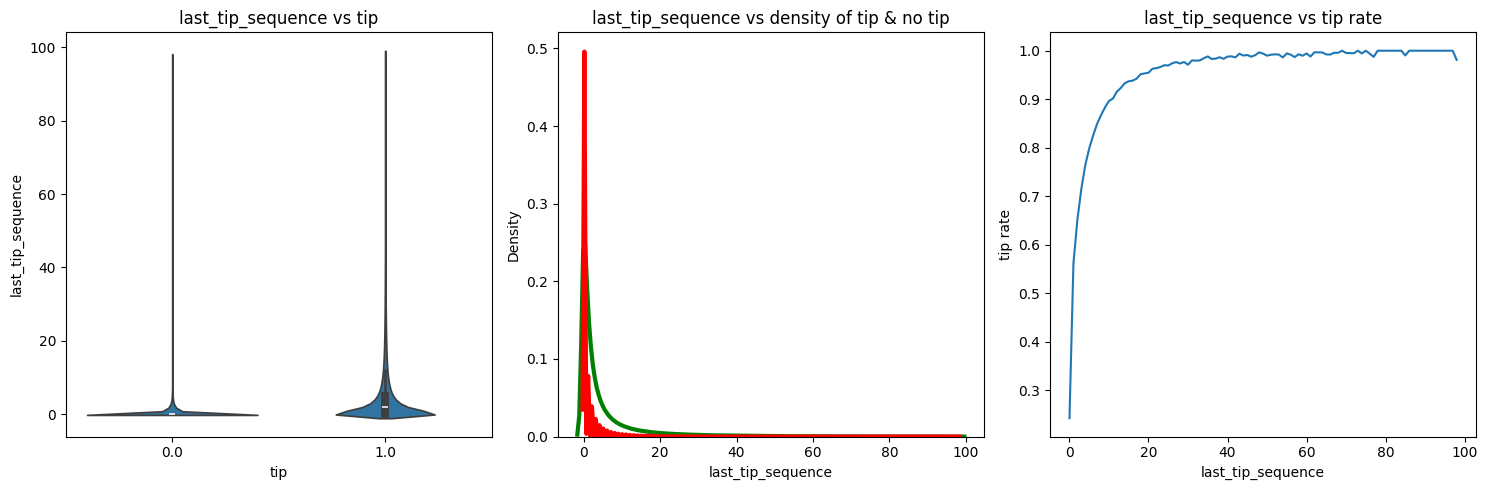

In [22]:
last_tip_sequence.analyze_feature(orders_tip_features)

### Comparison of features

The comparison of the features is based on correlations and regression coefficients. The correlations and the 

## Model Training

Describe Pipeline Architecture. Time serious cross validation 


## Accuracy Prediction